In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(pd.read_csv('train.csv'))

# Any results you write to the current directory are saved as output.

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

test = test.iloc[:,:].values

In [5]:
np.unique(np.isnan(X))

array([False])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

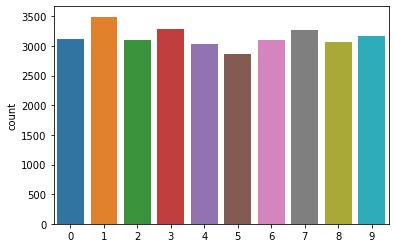

In [7]:
sns.countplot(y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_test = sc_X.transform(test)

In [32]:
from sklearn.svm import SVC
# print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='sigmoid', random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
# y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_acc = classifier.score(X_train, y_train)
test_acc = classifier.score(X_test, y_test)
# conf_mat = confusion_matrix(y_test,y_pred)

In [35]:
print('\nSVM Trained Classifier Accuracy: ', train_acc)
print('\nSVM Test Classifier Accuracy: ', test_acc)

# print('\nPredicted Values: ',y_pred)
# print('\nAccuracy of Classifier on T Images: ',test_acc)
# print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.31

SVM Test Classifier Accuracy:  0.31733333333333336


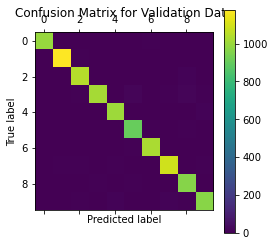

In [21]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
result = classifier.predict(sc_test)

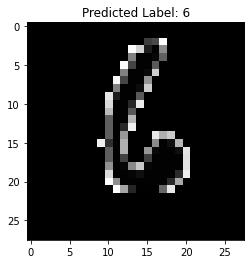

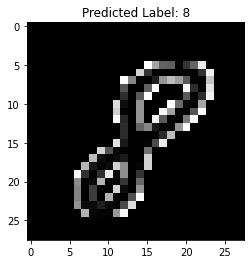

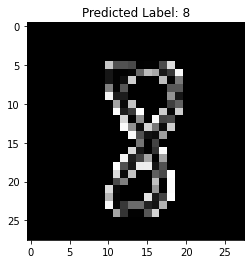

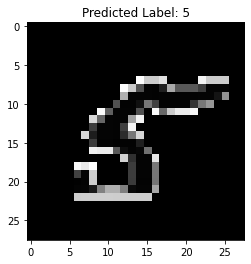

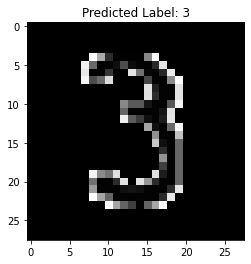

In [23]:
a = np.random.randint(1,400,5)
for i in a:
    two_d = (np.reshape(test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Predicted Label: {0}'.format(result[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [24]:
submission = pd.Series(result,name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [26]:
submission.to_csv("final_submission_v1.csv",index=False)

In [27]:
final_submission = pd.read_csv("final_submission_v1.csv")

In [28]:
final_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [29]:
print(result)

[2 0 9 ... 3 9 2]
